In [1]:
import xarray as xr

In [4]:
ds_old = xr.open_dataset('/Datasets.private/marinehw/NMME_newforecast/NMME_prob90_24_05_13.nc')

ds_new = xr.open_dataset('/Datasets.private/marinehw/nmme_mhw_prob/NMME_prob90_24_05_21.nc')


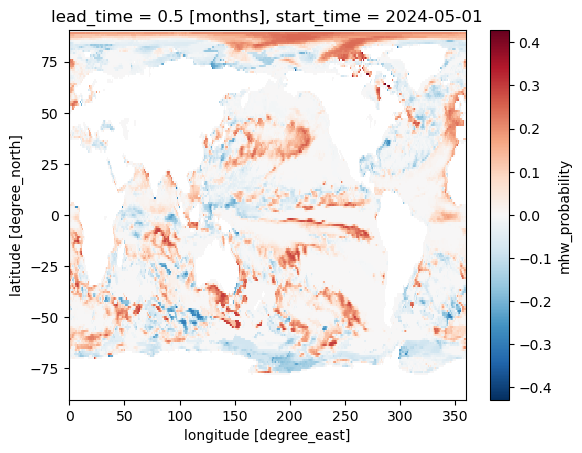

In [8]:
(ds_new-ds_old).mhw_probability.isel(lead_time=0,start_time=-1).plot()

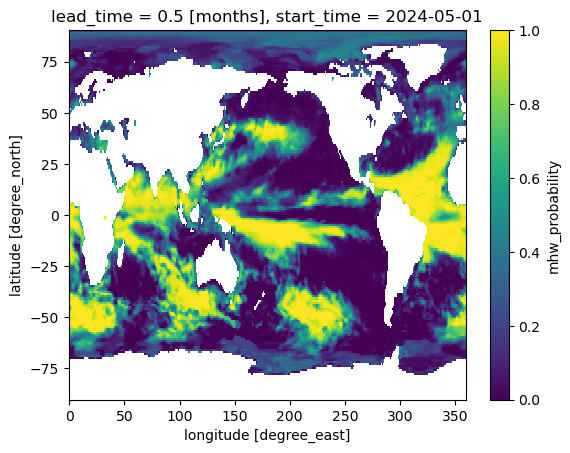

In [6]:
ds_new.mhw_probability.isel(lead_time=0,start_time=-1).plot()

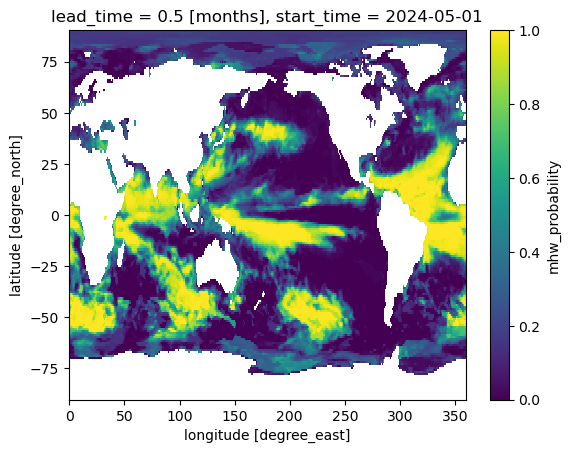

In [7]:
ds_old.mhw_probability.isel(lead_time=0,start_time=-1).plot()

In [3]:
ds_test = xr.open_dataset('/Datasets.private/marinehw/nmme_sst_raw/GEM5-NEMO_forecast_24_05_17_202302.nc',decode_times=False)


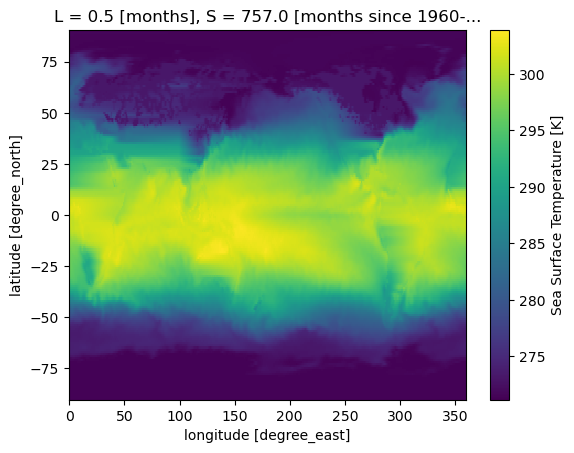

In [6]:
ds_test.sst.isel(M=0,L=0).plot()

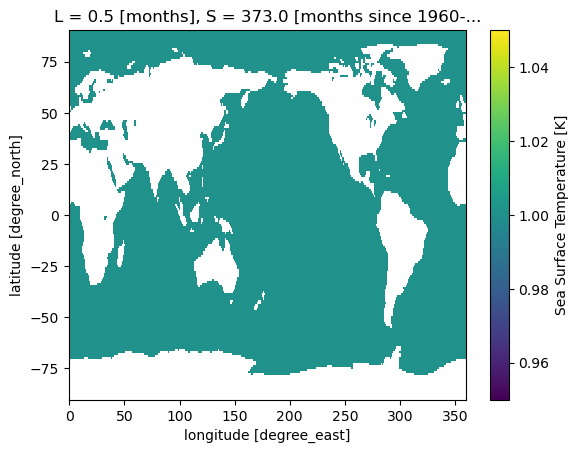

In [12]:
ds_test2 = xr.open_dataset('/Datasets.private/marinehw/nmme_sst_raw/CanCM4i_forecast_24_02_15_199102.nc',decode_times=False)
da_mask = ds_test2.sst.isel(M=0,L=0)
da_mask = da_mask.where(da_mask!=0)
da_mask = da_mask.where(da_mask.isnull(),other=1)
da_mask.plot()

In [16]:
ds_old = xr.open_dataset('/Datasets.private/marinehw/NMME_preprocess/GFDL-SPEAR-regridded_mhw_detrend90.nc')
ds_new = xr.open_dataset('/Datasets.private/marinehw/nmme_sst_stat/GFDL-SPEAR-regridded_mhw_detrend90.nc')

In [17]:
ds = (ds_old.isel(L=0,S=0,M=0)-ds_new.isel(L=0,S=0,M=0)).compute()

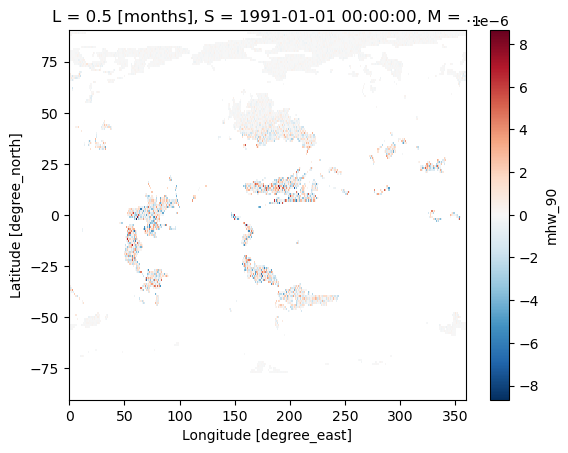

In [18]:
ds.mhw_90.plot()

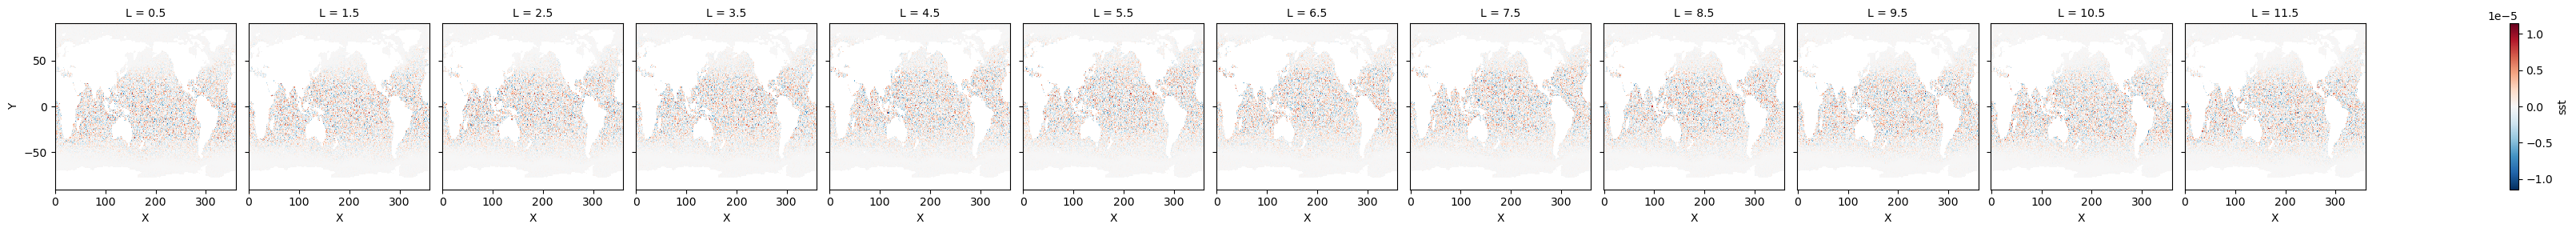

In [7]:
ds.sst.isel(month=2).plot(col='L')

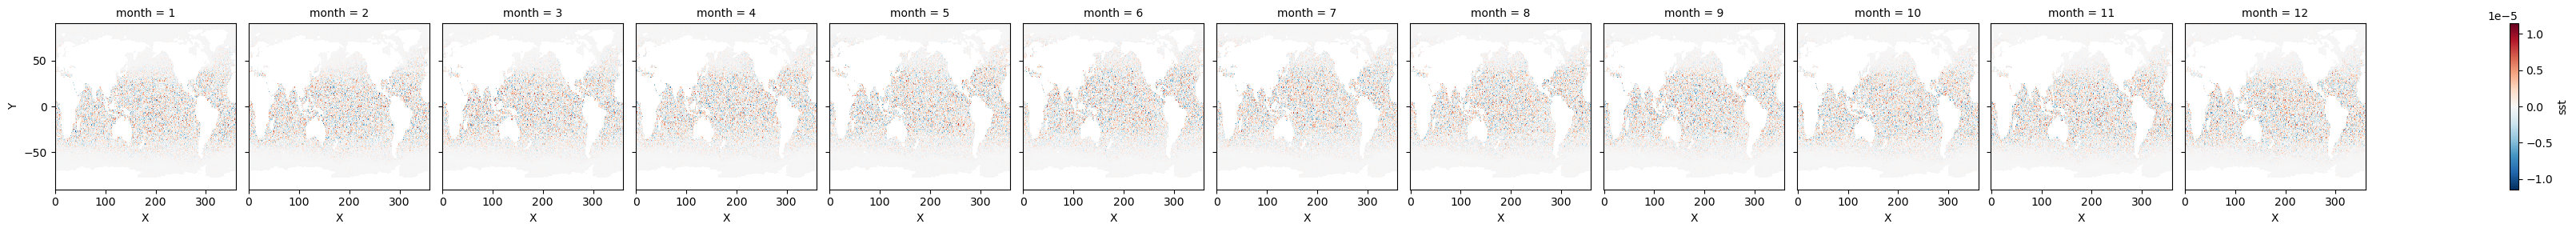

In [8]:
ds.sst.isel(L=2).plot(col='month')

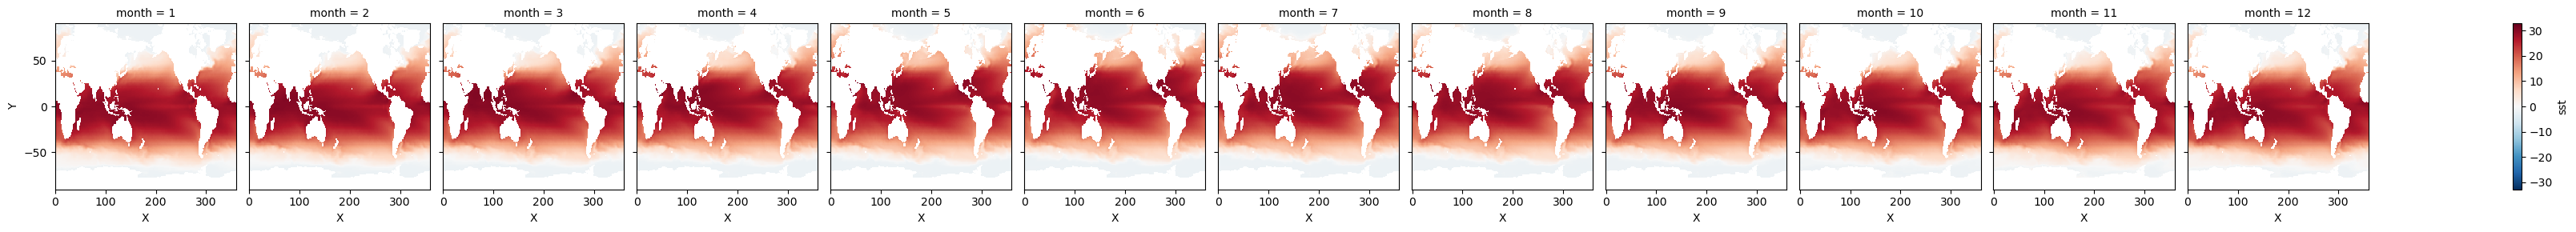

In [17]:
ds_new.sst.isel(L=2).plot(col='month')

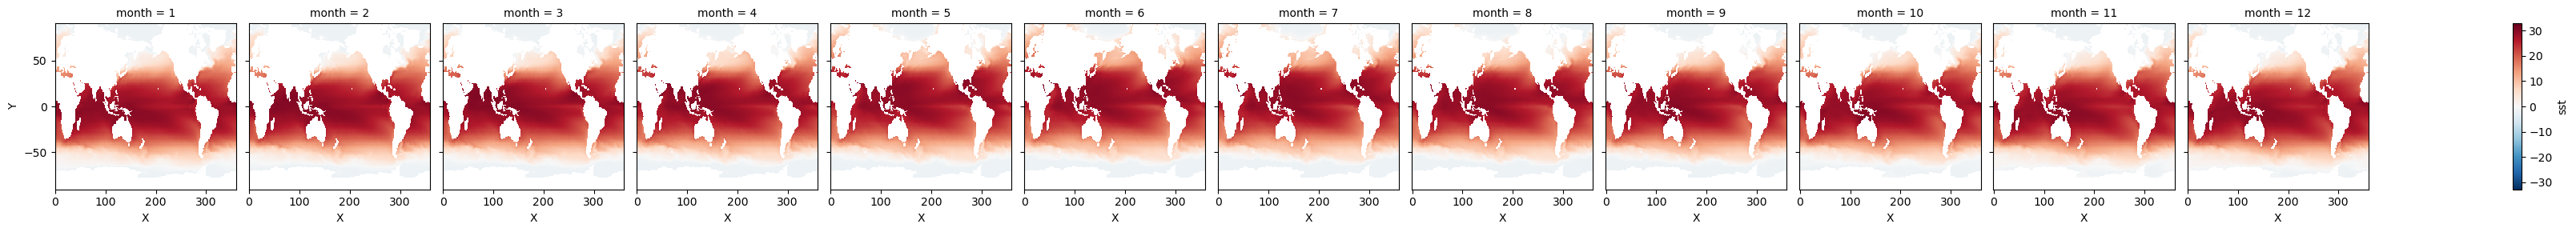

In [18]:
ds_old.sst.isel(L=2).plot(col='month')

In [29]:
import cftime

ds_old_raw = xr.open_dataset('/Datasets.private/marinehw/NMME_preprocess/COLA-RSMAS-CCSM4_hindcastforcast.nc',decode_times=False)
ds_old_raw = ds_old_raw.drop_duplicates(dim='S')
ds_old_raw['S'] = cftime.num2date(ds_old_raw['S'],
                                ds_old_raw.S.units,
                                calendar='360_day')

from nmme_climo import read_nmme
ds_new_raw = read_nmme(
            forecast_files = '/Datasets.private/marinehw/nmme_sst_raw/COLA-RSMAS-CCSM4_forecast_??_??_??_??????.nc',
            model = 'COLA-RSMAS-CCSM4'
        )

reading data
dropping duplicate between forecast and hindcast
original S : 401
modified S : 401


In [30]:
climatology_period = [1991,2020]
ds_old_raw = ds_old_raw.where((ds_old_raw['S.year']>=climatology_period[0]) &
                                  (ds_old_raw['S.year']<=climatology_period[1]),drop=True)

In [23]:
climatology_period = [1991,2020]
ds_new_raw = ds_new_raw.where((ds_new_raw['S.year']>=climatology_period[0]) &
                                  (ds_new_raw['S.year']<=climatology_period[1]),drop=True)

In [31]:
from nmme_climo import nmme_ens_climo
ds_old_raw_climo = nmme_ens_climo(ds_old_raw,climo_dim='S',ens_dim='M').compute()

In [25]:
ds_new_raw_climo = nmme_ens_climo(ds_new_raw,climo_dim='S',ens_dim='M').compute()

In [32]:
ds_diff = ds_old_raw_climo-ds_new_raw_climo

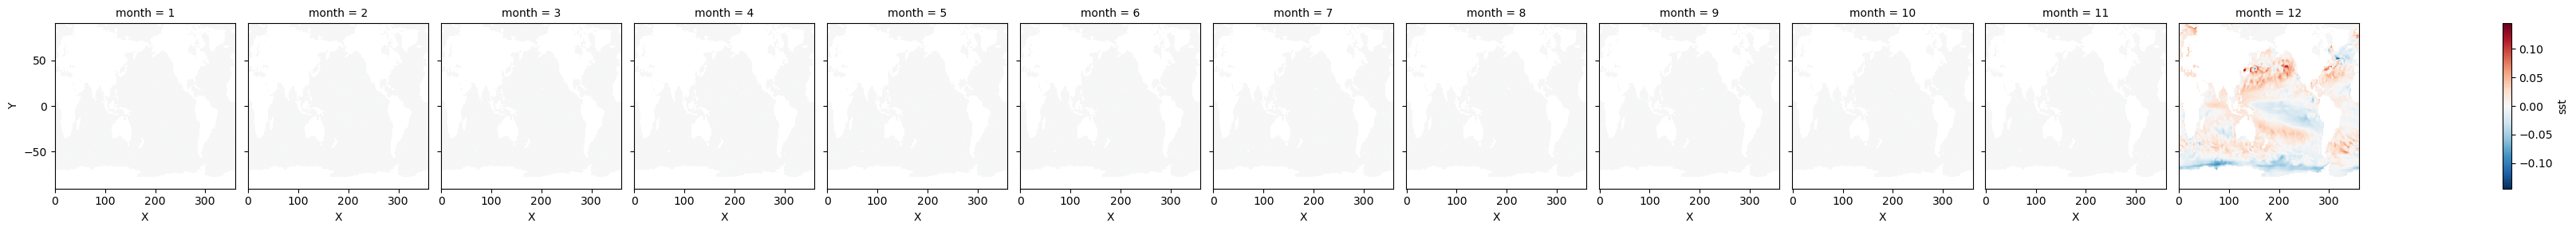

In [33]:
ds.sst.isel(L=2).plot(col='month')

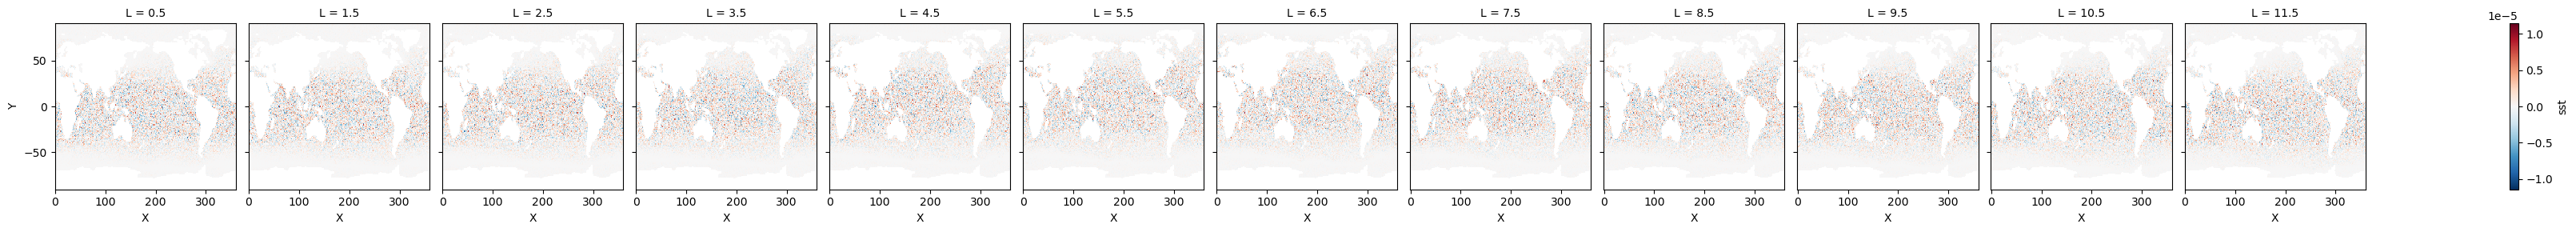

In [34]:
ds_old = xr.open_dataset('/Datasets.private/marinehw/NMME_preprocess/COLA-RSMAS-CESM1_climo.nc')
ds_new = xr.open_dataset('/Datasets.private/marinehw/nmme_sst_stat/COLA-RSMAS-CESM1_climo.nc')
ds = ds_old-ds_new
ds.sst.isel(month=2).plot(col='L')
CanCM4i GEM-NEMO GFDL-SPEAR NASA-GEOSS2S COLA-RSMAS-CCSM4 NCEP-CFSv2 CanCM4i-IC3 GEM5-NEMO COLA-RSMAS-CESM1 GFDL-SPEAR-regridded


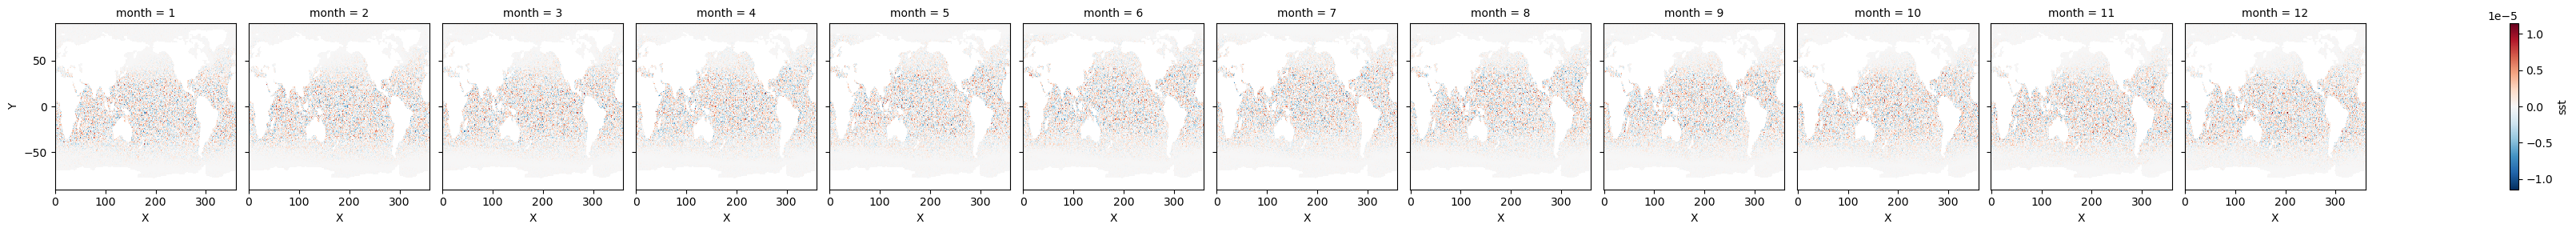

In [35]:
ds.sst.isel(L=2).plot(col='month')